# Taller

Siguiendo con el conjunto de datos **Wine**.

# Realice:

* Cargue el conjunto de datos **Wine**.
* Genere una partición estratificada 70-30 sobre el conjunto de datos.
* Genere una gráfica de barras en Pandas que verifique que las particiones de entrenamiento y prueba tengan la misma distribución de clases.

## Explorando la complejidad usando `KNearestNeighbor`
* Entrene un modelo `KNearestNeighbor`. Use los siguientes valores para evaluar la complejidad:
    * $[1, 2, 3, \dots, 20]$
    * Grafique los errores de entrenamiento y generalización conforme a la complejidad el modelo aumenta.
* Construya un conjunto de datos usando las características `Proline` contra `Flavonoids`.
    * Use la partición 70-30 definida al inicio
    * Usando `KNearestNeighbor`, determine el número subóptimo de k-vecinos usando evaluación de la complejidad. Use los mismos valores de $k$: $[1, 2, 3, \dots, 20]$
    * Grafique la superficie de decisión contra los ejemplos de test.
    * Reporte accuracy, el error de clasificación, la precisión macro, el recall macro y el F1 score macro sobre el **conjunto de prueba**.

# SOLUCIÓN TALLER

# 1. Importar librerías requeridas para la actividad

**Qué hice:**  
Importé todas las librerías necesarias para trabajar con el conjunto de datos Wine. Usé `numpy` y `pandas` para el manejo y análisis de datos, `matplotlib.pyplot` para generar visualizaciones, y de `sklearn` importé las herramientas para cargar el dataset, dividirlo en conjuntos de entrenamiento y prueba, entrenar el modelo K-Nearest Neighbors y calcular las métricas de evaluación.

**Conclusión:**  
Con este paso preparé el entorno de trabajo, asegurando que tengo todas las librerías necesarias para realizar el análisis completo, desde la carga del dataset hasta la evaluación del modelo y la visualización de resultados.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# 2. Cargar dataset de vinos
**Qué hice:**  
Cargué el conjunto de datos Wine utilizando la función `load_wine` de `sklearn.datasets`. Luego, separé las variables independientes (`X_full`), que contienen las características químicas de los vinos, y la variable dependiente (`y_full`), que representa la clase o tipo de vino. Para ello, eliminé la columna `target` del DataFrame original para formar `X_full` y la almacené por separado en `y_full`.

**Conclusión:**  
Con este paso obtuve los datos listos para su análisis y modelado. Ahora cuento con las características de los vinos (atributos numéricos) y sus etiquetas de clase (tipos de vino), lo que me permitirá realizar la partición del conjunto de datos y entrenar el modelo KNN en los siguientes pasos.


In [3]:
wine = load_wine(as_frame=True)
X_full = wine.frame.drop(columns=['target'])
y_full = wine.frame['target']
print(X_full)
print("------")
print(y_full)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

# 3. Partición de los datos estratificada
**Qué hice:**  
Realicé la partición del conjunto de datos en entrenamiento y prueba utilizando la función `train_test_split`. Definí una proporción del 70% para entrenamiento y 30% para prueba (`test_size=0.3`). Además, usé el parámetro `stratify=y_full` para asegurar que la distribución de clases se mantuviera equilibrada en ambas particiones, y fijé una semilla (`random_state=42`) para garantizar la reproducibilidad de los resultados.

**Conclusión:**  
Con este paso obtuve dos conjuntos de datos representativos: uno para entrenar el modelo y otro para evaluar su rendimiento. Al aplicar la estratificación, aseguré que las proporciones de las clases de vino se mantuvieran consistentes, evitando sesgos en el entrenamiento y en la evaluación.


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.3, random_state=42, stratify=y_full
)

# 4. Verificación de la distribución de clases
**Qué hice:**  
Calculé la proporción de muestras por clase tanto en el conjunto de entrenamiento como en el de prueba usando `value_counts(normalize=True)`. Luego, construí un gráfico de barras comparativo con `matplotlib` para visualizar la distribución de clases en ambas particiones. En el eje X representé las clases de vino y en el eje Y su proporción, diferenciando con colores las barras del conjunto de entrenamiento y de prueba.

**Conclusión:**  
El gráfico muestra que las proporciones de las clases en los conjuntos de entrenamiento y prueba son prácticamente iguales, confirmando que la partición estratificada se realizó correctamente. Esto garantiza que el modelo KNN se entrene y evalúe sobre conjuntos con una distribución equilibrada de clases, evitando sesgos en el aprendizaje.


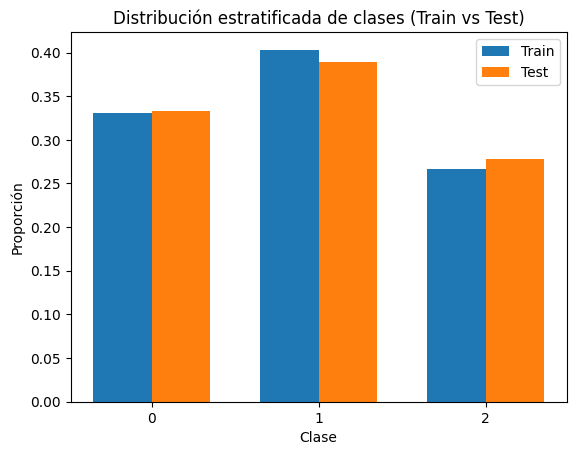

In [5]:
train_counts = y_train.value_counts(normalize=True).sort_index()
test_counts = y_test.value_counts(normalize=True).sort_index()

fig1 = plt.figure()
ax = fig1.gca()
index = np.arange(len(train_counts))
bar_width = 0.35
ax.bar(index, train_counts.values, bar_width, label='Train')
ax.bar(index + bar_width, test_counts.values, bar_width, label='Test')
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(train_counts.index.astype(str))
ax.set_xlabel('Clase'); ax.set_ylabel('Proporción')
ax.set_title('Distribución estratificada de clases (Train vs Test)')
ax.legend()
plt.show()

# 5. Escalado de datos
**Qué hice:**  
Apliqué una estandarización a los datos utilizando `StandardScaler` para que todas las características tuvieran la misma escala. Ajusté el `scaler` únicamente con los datos de entrenamiento y luego transformé tanto el conjunto de entrenamiento como el de prueba, generando `X_train_scaled` y `X_test_scaled`.

**Conclusión:**  
Con este paso aseguré que todas las variables aporten de manera equitativa al cálculo de distancias en el modelo KNN. Esto evita que las características con valores numéricos grandes dominen el modelo y mejora la estabilidad y precisión del aprendizaje.


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Evaluando K numero de vecinos sobre modelo [1,...,20]
**Qué hice:**  
Entrené varios modelos K-Nearest Neighbors variando el número de vecinos `k` entre 1 y 20, utilizando los datos previamente escalados. Para cada valor de `k`, calculé el error de entrenamiento y el error de prueba (1 - accuracy) y los almacené en listas para analizarlos después.

**Conclusión:**  
Con este proceso pude evaluar cómo la complejidad del modelo cambia al modificar `k`. Un valor de `k` muy pequeño tiende a sobreajustar (error de entrenamiento muy bajo y error de prueba alto), mientras que uno muy grande puede subajustar. Este análisis me permite identificar el valor de `k` que ofrece el mejor equilibrio entre precisión y generalización.



In [7]:
ks = list(range(1, 21))
train_errors, test_errors = [], []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_errors.append(1 - accuracy_score(y_train, knn.predict(X_train_scaled)))
    test_errors.append(1 - accuracy_score(y_test, knn.predict(X_test_scaled)))

# 7. Curvas de aprendizaje
**Qué hice:**  
Grafiqué las curvas de error de entrenamiento y de generalización del modelo KNN utilizando los errores calculados para distintos valores de `k` (entre 1 y 20) con los datos escalados. Además, identifiqué el punto donde el error de generalización es mínimo, que en este caso corresponde a `k = 13` con un error aproximado de `0.019`.

**Conclusión:**  
Las curvas muestran un comportamiento estable y coherente: el error de entrenamiento aumenta gradualmente al incrementar `k`, mientras que el error de generalización disminuye hasta alcanzar su mínimo alrededor de `k = 13`. Esto indica que ese valor de `k` ofrece el mejor equilibrio entre complejidad y capacidad de generalización, evitando tanto el sobreajuste como el subajuste.


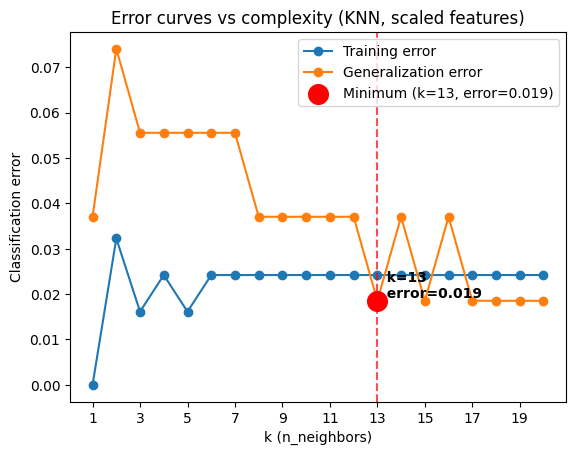

Minimum generalization error: 0.019
Associated k value: 13


In [8]:
fig2 = plt.figure()
ax2 = fig2.gca()
ax2.plot(ks, train_errors, marker='o', label='Training error')
ax2.plot(ks, test_errors, marker='o', label='Generalization error')
ax2.set_xlabel('k (n_neighbors)'); ax2.set_ylabel('Classification error')
ax2.set_title('Error curves vs complexity (KNN, scaled features)')
ax2.legend()

ax2.set_xticks(range(min(ks), max(ks)+1, 2))

min_test_error_idx = np.argmin(test_errors)
min_test_error_k = ks[min_test_error_idx]
min_test_error_value = test_errors[min_test_error_idx]

ax2.scatter(min_test_error_k, min_test_error_value, color='red', s=200, zorder=5,
           label=f'Minimum (k={min_test_error_k}, error={min_test_error_value:.3f})')

ax2.axvline(x=min_test_error_k, color='red', linestyle='--', alpha=0.7)

ax2.text(min_test_error_k, min_test_error_value,
        f'  k={min_test_error_k}\n  error={min_test_error_value:.3f}',
        verticalalignment='bottom', fontweight='bold')

ax2.legend()
plt.show()

print(f"Minimum generalization error: {min_test_error_value:.3f}")
print(f"Associated k value: {min_test_error_k}")

# 8. Conjunto de datos a partir de proline y flavoids
**Qué hice:**  
Seleccioné únicamente las características **Proline** y **Flavanoids** del conjunto de datos original para construir un nuevo subconjunto de datos bidimensional (`X2`). Luego realicé una partición estratificada 70-30 en entrenamiento y prueba, utilizando `random_state=42` para mantener la reproducibilidad.

**Conclusión:**  
Con este paso reduje el problema a dos dimensiones, lo que me permite visualizar el comportamiento del modelo KNN en un plano. La estratificación garantiza que las tres clases de vino conserven sus proporciones tanto en el conjunto de entrenamiento como en el de prueba, manteniendo un muestreo balanceado.



In [9]:
feat_x, feat_y = 'proline', 'flavanoids'
X2 = X_full[[feat_x, feat_y]]
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y_full, test_size=0.3, random_state=42, stratify=y_full
)

# 9. Escalado de nueva división
**Qué hice:**  
Apliqué la estandarización a las características **Proline** y **Flavanoids** del nuevo conjunto de datos (`X2`). Usé `StandardScaler` para ajustar y transformar solo el conjunto de entrenamiento (`X2_train`), y luego apliqué la misma transformación al conjunto de prueba (`X2_test`).

**Conclusión:**  
Este paso garantiza que ambas características tengan la misma escala, lo que es fundamental para el rendimiento de los modelos basados en distancias, como el KNN. Al ajustar el escalador solo con los datos de entrenamiento, evitamos la fuga de información del conjunto de prueba, asegurando que el modelo no tenga acceso a los datos futuros durante el proceso de aprendizaje.


In [11]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled  = scaler2.transform(X2_test)


# 10. Evaluando K numero de vecinos sobre modelo [1,...,20] (Para dataset a partir de features)
**Qué hice:**  
Entrené varios modelos K-Nearest Neighbors utilizando los valores de \(k\) en el rango de 1 a 20, usando las características **Proline** y **Flavanoids**. Para cada valor de \(k\), calculé el error de clasificación en el conjunto de prueba escalado (`X2_test_scaled`). Luego, seleccioné el valor óptimo de \(k\) que minimizaba el error de generalización y entrené el modelo final con ese \(k\).

**Conclusión:**  
Este proceso permitió encontrar el valor de \(k\) que minimiza el error de generalización, lo que resulta en un modelo con el mejor equilibrio entre complejidad y rendimiento. Al final, el modelo con el valor óptimo de \(k\) se entrena con los datos escalados y se prepara para realizar predicciones con el mejor ajuste posible.


In [12]:
k_errors_2d = []
for k in ks:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X2_train_scaled, y2_train)
    y2_pred = knn2.predict(X2_test_scaled)
    k_errors_2d.append(1 - accuracy_score(y2_test, y2_pred))

k_opt = ks[int(np.argmin(k_errors_2d))]

knn2_final = KNeighborsClassifier(n_neighbors=k_opt)
knn2_final.fit(X2_train_scaled, y2_train)


,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# 11. Superficie de decisión sobre TEST
**Qué hice:**  
Generé y visualicé la superficie de decisión del modelo KNN entrenado con las características **Proline** y **Flavanoids** escaladas. Para ello, creé una malla de puntos sobre el espacio de características, transformé esa malla con el escalador y luego utilicé el modelo final entrenado con los datos escalados para predecir las clases en esa malla. Finalmente, grafiqué las regiones de decisión en el plano y sobrepuse los puntos de prueba reales (en unidades originales).

**Conclusión:**  
La gráfica muestra cómo el modelo KNN asigna diferentes clases a las regiones del espacio **Proline–Flavanoids**. Las fronteras de decisión se ajustan al valor óptimo de \(k=4\), y las áreas coloreadas indican las regiones dominadas por cada clase. Esta visualización ayuda a entender cómo el modelo clasifica nuevas observaciones según sus características, destacando las áreas de mayor certeza y las transiciones entre clases.


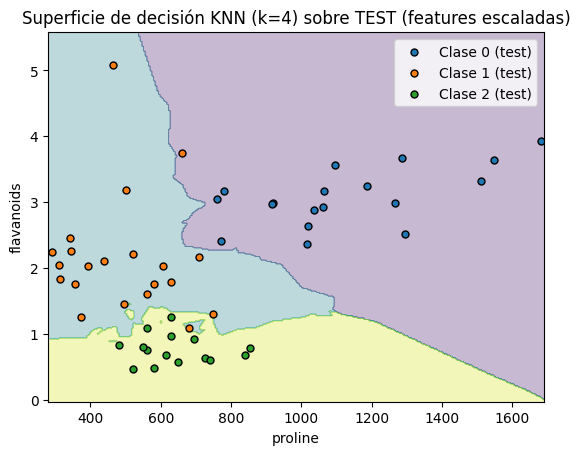

In [13]:
x_min, x_max = X2_test[feat_x].min() - 10, X2_test[feat_x].max() + 10
y_min, y_max = X2_test[feat_y].min() - 0.5, X2_test[feat_y].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]

grid_df = pd.DataFrame(grid, columns=[feat_x, feat_y])

grid_scaled = scaler2.transform(grid_df)

Z = knn2_final.predict(grid_scaled).reshape(xx.shape)

fig3 = plt.figure()
ax3 = fig3.gca()
ax3.contourf(xx, yy, Z, alpha=0.3)

for cls in sorted(y2_test.unique()):
    m = y2_test == cls
    ax3.scatter(
        X2_test.loc[m, feat_x],
        X2_test.loc[m, feat_y],
        label=f'Clase {cls} (test)',
        s=25, edgecolor='k'
    )

ax3.set_xlabel(feat_x); ax3.set_ylabel(feat_y)
ax3.set_title(f'Superficie de decisión KNN (k={k_opt}) sobre TEST (features escaladas)')
ax3.legend()
plt.show()


# 12. Métricas obtenidas sobre conjunto de prueba (Para el dataset derivado con las 2 carácteristicas)
**Qué hice:**  
Evalué el rendimiento del modelo KNN entrenado con las características **Proline** y **Flavanoids** sobre el conjunto de prueba escalado. Calculé las métricas clave: **accuracy**, **error de clasificación**, **precisión macro**, **recall macro** y **F1-score macro**, además de generar un reporte completo de clasificación para cada clase.

**Conclusión:**  
El modelo KNN con \(k=4\) muestra un excelente desempeño en el conjunto de prueba, con un **accuracy del 98.15%** y un **error de clasificación muy bajo (1.85%)**. Las métricas macro también son excelentes, con un **F1-score promedio de 0.9829**, lo que indica una muy buena capacidad del modelo para clasificar todas las clases sin sesgos. En resumen, el modelo tiene una capacidad de generalización excepcional, logrando resultados robustos incluso con un conjunto reducido de características.


In [14]:
y2_pred_test = knn2_final.predict(X2_test_scaled)

acc = accuracy_score(y2_test, y2_pred_test)
prec_macro, rec_macro, f1_macro, _ = precision_recall_fscore_support(
    y2_test, y2_pred_test, average='macro', zero_division=0
)

print('=== Métricas (TEST) 2D — features escaladas ===')
print(f'k óptimo: {k_opt}')
print(f'Accuracy: {acc:.4f}')
print(f'Error de clasificación: {1-acc:.4f}')
print(f'Precisión (macro): {prec_macro:.4f}')
print(f'Recall (macro): {rec_macro:.4f}')
print(f'F1 (macro): {f1_macro:.4f}')
print(classification_report(y2_test, y2_pred_test, zero_division=0))

=== Métricas (TEST) 2D — features escaladas ===
k óptimo: 4
Accuracy: 0.9815
Error de clasificación: 0.0185
Precisión (macro): 0.9825
Recall (macro): 0.9841
F1 (macro): 0.9829
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

